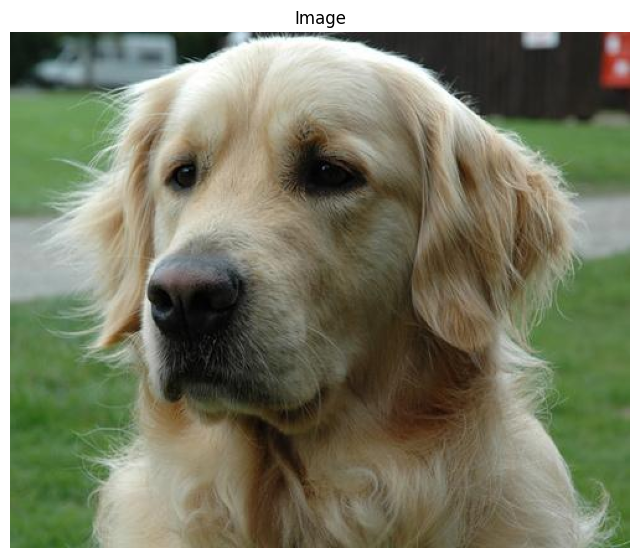

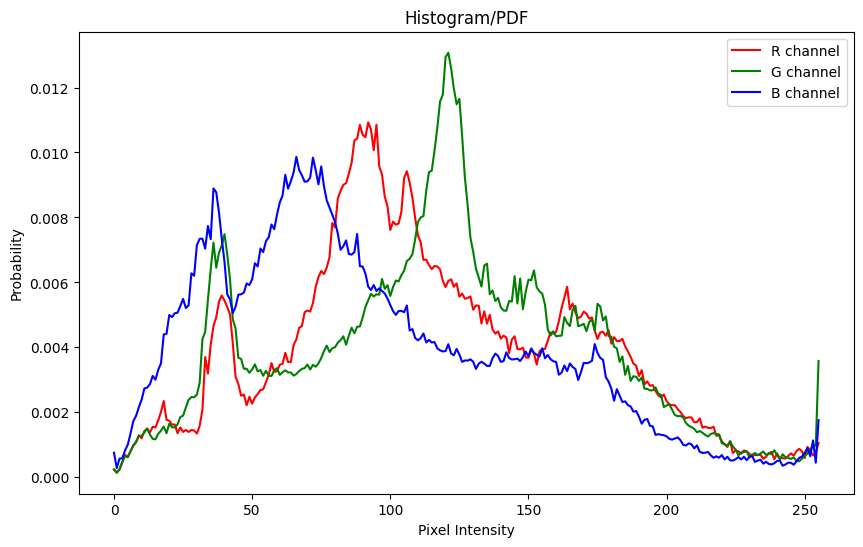

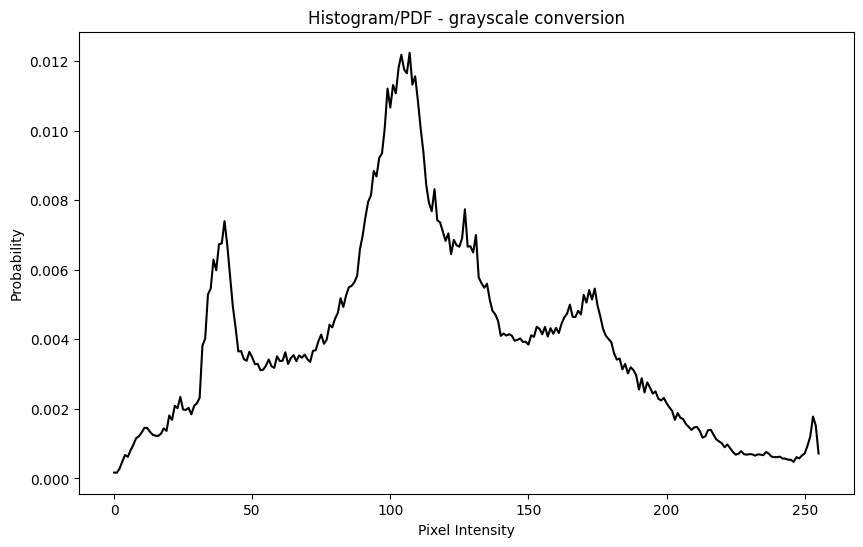

Red Channel - KS Statistic: 0.0636753899199145, P-value: 0.0
Green Channel - KS Statistic: 0.04297715233869076, P-value: 0.0
Blue Channel - KS Statistic: 0.0904531690123424, P-value: 0.0


In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

image_path = "n02099601_146.jpg"  
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(8, 8)); plt.imshow(image_rgb); plt.axis('off'); plt.title('Image'); plt.show()

colors = ('r', 'g', 'b')
pdf_values = {}
plt.figure(1, figsize=(10, 6))

for i, color in enumerate(colors): # r, g, b histograms plot
    hist = cv2.calcHist([image_rgb], [i], None, [256], [0, 256])  
    pdf = hist / hist.sum() # normalized
    pdf_values[color] = pdf.flatten()
    plt.plot(pdf, color=color, label=f'{color.upper()} channel')

plt.title('Histogram/PDF'); plt.xlabel('Pixel Intensity'); plt.ylabel('Probability'); plt.legend(); plt.show()

grayscale_hist = cv2.calcHist([image_gray], [0], None, [256], [0, 256])
pdf_gs = grayscale_hist / grayscale_hist.sum()
plt.figure(2, figsize=(10, 6))
plt.plot(pdf_gs, color='black')

plt.title('Histogram/PDF - grayscale conversion'); plt.xlabel('Pixel Intensity'); plt.ylabel('Probability'); plt.show()


# K-S Test
R = channels[2].flatten() 
G = channels[1].flatten()  
B = channels[0].flatten() 

ks_statistic_R, p_value_R = stats.kstest(R, 'norm', args=(np.mean(R), np.std(R)))
ks_statistic_G, p_value_G = stats.kstest(G, 'norm', args=(np.mean(G), np.std(G)))
ks_statistic_B, p_value_B = stats.kstest(B, 'norm', args=(np.mean(B), np.std(B)))

print(f"Red Channel - KS Statistic: {ks_statistic_R}, P-value: {p_value_R}")
print(f"Green Channel - KS Statistic: {ks_statistic_G}, P-value: {p_value_G}")
print(f"Blue Channel - KS Statistic: {ks_statistic_B}, P-value: {p_value_B}")

In [12]:
channels = cv2.split(image)

def calculate_moments(channel):  
    mean = np.mean(channel)
    variance = np.var(channel)
    
    skewness = np.mean((channel - mean)**3) / (np.std(channel)**3)
    kurtosis = np.mean((channel - mean)**4) / (np.std(channel)**4) - 3
    
    return mean, variance, skewness, kurtosis

moments_R = calculate_moments(channels[2])  
moments_G = calculate_moments(channels[1])  
moments_B = calculate_moments(channels[0]) 

print(f"Red: Mean = {moments_R[0]}, Variance = {moments_R[1]}, Skewness = {moments_R[2]}, Curtosis = {moments_R[3]}")
print(f"Green: Mean = {moments_G[0]}, Variance = {moments_G[1]},  Skewness = {moments_G[2]}, Curtosis = {moments_G[3]}")
print(f"Blue: Mean = {moments_B[0]}, Variance = {moments_B[1]}, Skewness = {moments_B[2]}, Curtosis = {moments_B[3]}")

Red: Mean = 115.05573076923076, Variance = 2731.4018075428994, Skewness = 0.2866107101785923, Curtosis = -0.4330221261870242
Green: Mean = 117.72005288461538, Variance = 2815.2616248048953,  Skewness = 0.07441428085141902, Curtosis = -0.4306540700128436
Blue: Mean = 93.49901442307693, Variance = 2972.1200086440226, Skewness = 0.6497307910835683, Curtosis = -0.26240679268289213


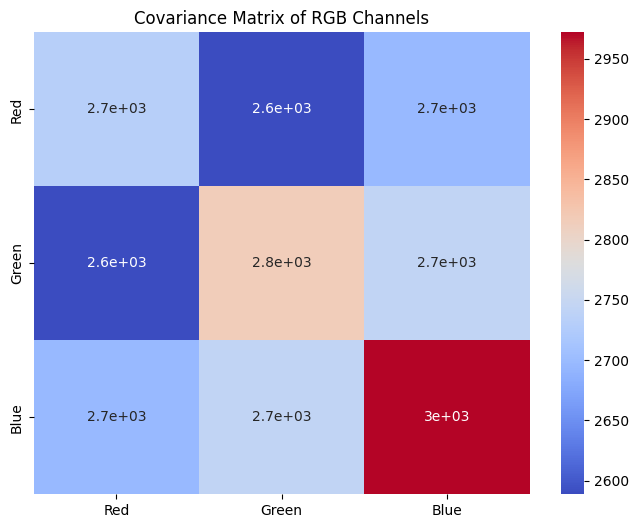


Variance and Covariance:
Variance of Red Channel: 2731.4149
Variance of Green Channel: 2815.2752
Variance of Blue Channel: 2972.1343
Covariance between Red and Green: 2588.6502
Covariance between Red and Blue: 2696.5893
Covariance between Green and Blue: 2743.1082


In [24]:
# Covariance analysis

import seaborn as sns

R = channels[2].flatten() 
G = channels[1].flatten()  
B = channels[0].flatten() 

ch = np.vstack((R, G, B))
cov_matrix = np.cov(ch)


plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', xticklabels=['Red', 'Green', 'Blue'], yticklabels=['Red', 'Green', 'Blue'])
plt.title('Covariance Matrix of RGB Channels'); plt.show()

# Print extracted values
print("\nVariance and Covariance:")
print(f"Variance of Red Channel: {cov_matrix[0, 0]:.4f}")
print(f"Variance of Green Channel: {cov_matrix[1, 1]:.4f}")
print(f"Variance of Blue Channel: {cov_matrix[2, 2]:.4f}")
print(f"Covariance between Red and Green: {cov_matrix[0, 1]:.4f}")
print(f"Covariance between Red and Blue: {cov_matrix[0, 2]:.4f}")
print(f"Covariance between Green and Blue: {cov_matrix[1, 2]:.4f}")

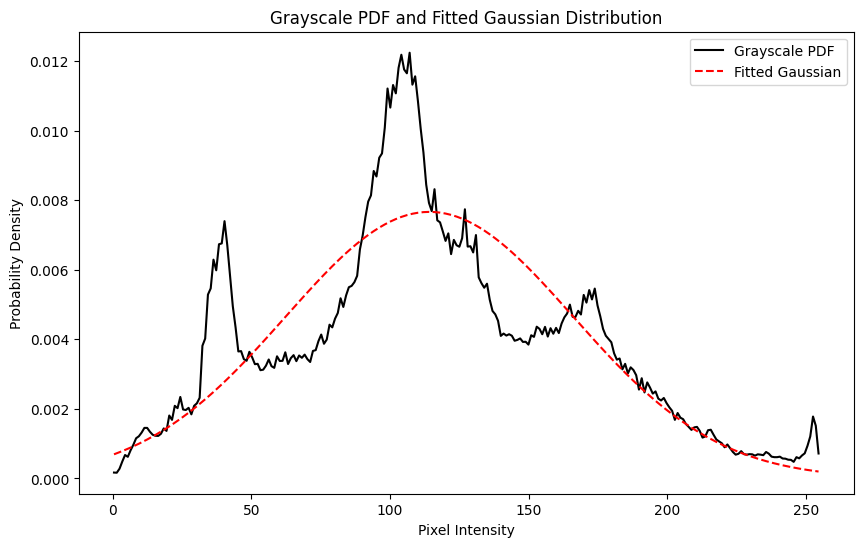

Fitted Gaussian Parameters for Grayscale Image:
Mean (μ): 114.17
Standard Deviation (σ): 52.08


In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

grayscale_array = grayscale_image.flatten()

grayscale_mean, grayscale_std = norm.fit(grayscale_array)
fitted_gaussian = norm.pdf(np.arange(0, 256),grayscale_mean, grayscale_std)

plt.figure(figsize=(10, 6))
plt.plot(bin_centers, pdf_gs, label="Grayscale PDF", color="black")
plt.plot(bin_centers, fitted_gaussian, '--', label="Fitted Gaussian", color="red")

plt.title("Grayscale PDF and Fitted Gaussian Distribution"); plt.xlabel("Pixel Intensity"); plt.ylabel("Probability Density"); plt.legend(); plt.show()

# Afișează parametrii distribuției Gaussiene ajustate
print(f"Fitted Gaussian Parameters for Grayscale Image:")
print(f"Mean (μ): {grayscale_mean:.2f}")
print(f"Standard Deviation (σ): {grayscale_std:.2f}")